In [49]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import pandas as pd

seed = 6740
np.random.seed(seed)

In [50]:
df = pd.read_csv('marriage.csv')
print(df.shape)
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

x_train_og, x_test_og, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = seed)

(169, 55)


In [51]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train_og)
x_test = scaler.fit_transform(x_test_og)
# Naive Bayes
nb_classifier = GaussianNB(var_smoothing=1e-3)
nb_classifier.fit(x_train,y_train)
predictions = nb_classifier.predict(x_test)
nb_accuracy = accuracy_score(y_test, predictions)
print(f"Naive Bayes accuracy: {nb_accuracy}")
# Logistic Regression
lr_classifier = LogisticRegression(max_iter=1000, random_state = seed)
lr_classifier.fit(x_train,y_train)
predictions = lr_classifier.predict(x_test)
lr_accuracy = accuracy_score(y_test, predictions)
print(f"LR accuracy: {lr_accuracy}")
# KNN
results = {}
for i in [2,3,4,5,6,7,8,9,10]:
    knn_classifier = KNeighborsClassifier(i)
    knn_classifier.fit(x_train,y_train)
    predictions = knn_classifier.predict(x_test)
    knn_accuracy = accuracy_score(y_test, predictions)
    results[i] = (knn_accuracy, knn_classifier)

best_k = max(results, key=lambda k: results[k][0])
best_knn_results = results[best_k]

print(f"KNN best accuracy (k={best_k}): {best_knn_results[0]}")

Naive Bayes accuracy: 0.9705882352941176
LR accuracy: 0.9705882352941176
KNN best accuracy (k=2): 0.9705882352941176


In [52]:
def plot_classifier(classifier,x_train, y_train, x_test, y_test):
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])

    
    all_x = np.vstack((x_train, x_test))
    all_y = np.hstack((y_train, y_test))
    DecisionBoundaryDisplay.from_estimator(classifier,all_x, cmap=cm, alpha=0.8, eps=0.5)

    plt.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap=cm_bright, edgecolors="k", marker='o', label='Train')
    plt.scatter(x_test[:,0], x_test[:,1], c=y_test, alpha=0.6,cmap=cm_bright, edgecolors="k", marker='x', label='Test')
    plt.legend()
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Boundary with {classifier.__class__.__name__}')
    plt.show()

Naive Bayes accuracy: 0.9705882352941176


C:\Users\pickardw\AppData\Local\Temp\ipykernel_23404\2098485420.py:11: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_test[:,0], x_test[:,1], c=y_test, alpha=0.6,cmap=cm_bright, edgecolors="k", marker='x', label='Test')


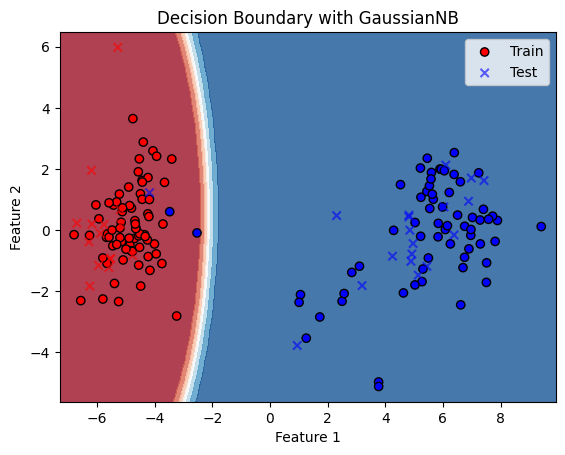

LR accuracy: 0.9705882352941176


C:\Users\pickardw\AppData\Local\Temp\ipykernel_23404\2098485420.py:11: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_test[:,0], x_test[:,1], c=y_test, alpha=0.6,cmap=cm_bright, edgecolors="k", marker='x', label='Test')


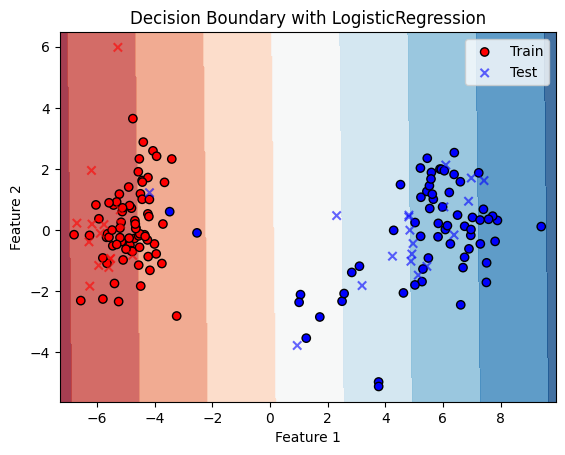

C:\Users\pickardw\AppData\Local\Temp\ipykernel_23404\2098485420.py:11: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_test[:,0], x_test[:,1], c=y_test, alpha=0.6,cmap=cm_bright, edgecolors="k", marker='x', label='Test')


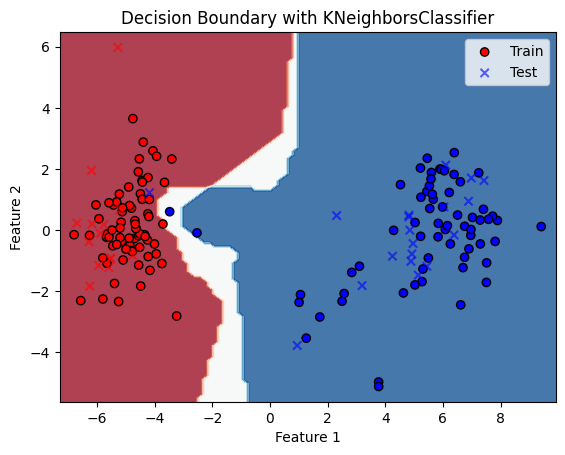

KNN best accuracy (k=2): 0.9705882352941176


In [53]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train_og)
x_test = scaler.fit_transform(x_test_og)
# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2, random_state=seed)
x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)

# Naive Bayes
nb_classifier = GaussianNB(var_smoothing=1e-3)
nb_classifier.fit(x_train,y_train)
nb_predictions = nb_classifier.predict(x_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
print(f"Naive Bayes accuracy: {nb_accuracy}")
plot_classifier(nb_classifier, x_train, y_train, x_test, y_test)

# Logistic Regression
lr_classifier = LogisticRegression(max_iter=1000, random_state = seed)
lr_classifier.fit(x_train,y_train)
lr_predictions = lr_classifier.predict(x_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f"LR accuracy: {lr_accuracy}")
plot_classifier(lr_classifier, x_train, y_train, x_test, y_test)


# KNN
knn_classifier = KNeighborsClassifier(best_k)
knn_classifier.fit(x_train,y_train)
knn_predictions = knn_classifier.predict(x_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
plot_classifier(knn_classifier, x_train, y_train, x_test, y_test)

print(f"KNN best accuracy (k={best_k}): {knn_accuracy}")